### Setup

This notebook explains how to to access the dataset models from django.
The datasets are loaded from the Postgres database into pandas dataframes.

To start the notebook server:

```
# Start a bash shell inside the api container
docker-compose exec api /bin/bash

# Start the jupyter notebook
python manage.py shell_plus --notebook

# Take note of the token provided and access the notebook through:
<ip-of-the-machine>:7777/?<token>
http://127.0.0.1:7777/?token=30c43675981e671b4a609cff470819098e274bbde415b7f5
```

This step has only to be made once as long as the jupyter-notebook keeps executing.
Considering that the the notebook continues to run, you can access the notebook using:
``` 
<ip-of-the-machine>:7777/?<token>
```

In [167]:
# Required to access the database
import os
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"

import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# Data analysis tools
import pandas as pd
import numpy as np
import seaborn as sns

# Models available in our application
from datasets.models import RawFlower, RawUNM, RawDAR
from django.contrib.auth.models import User

In [168]:
from api import adapters
from api import analysis

In [169]:
from datasets.models import RawNEU
df = pd.DataFrame.from_records(
        RawNEU.objects.
        # exclude(Creat_Corr_Result__lt=-1000).
        # exclude(Creat_Corr_Result__isnull=True).
        values()
    )


#adapters.neu.get_dataframe()

# Get Dataframes

In [96]:

"""def get_dataframe_neu():
    

    # First is necessary to pivot the raw NEU dataset so it matches
    # the requested features.

    # This queries the RawNEU dataset and excludes some of the values
    # TODO - Should we drop NaN here?
    df = pd.DataFrame.from_records(
        RawNEU.objects.
        # exclude(Creat_Corr_Result__lt=-1000).
        # exclude(Creat_Corr_Result__isnull=True).
        values()
    )

    ## birth weight and length
  
    df['birthWt'] = df['birthWt'] * 1000
    df['birthLen'] = df['birthLen'] * 2.54

    ## education connversion

    df['ed'] = df['ed'].astype(float)

    conditions = [
    (df['ed'] <= 8 ),
    (df['ed'].isin([9,10,11,12])),
    (df['ed'].isin([13,14])) ,
    (df['ed'] == 15 ),
    (df['ed'] > 15 ) &  (df['ed'] < 20) ,
    ]
    choices = [1,2,3,4,5]

    df['education'] = np.select(conditions, choices, default=-9)
    ## birth year
    df['PPDATEDEL'] = pd.to_datetime(df['PPDATEDEL'],errors='coerce')
    df['birth_year'] = pd.to_datetime(df['PPDATEDEL'],errors='coerce').dt.year
    df["LOD"]=df["LOD"]
    
    ## new covariates

    ## df.rename(columns = {'pregnum':'parity'}, inplace = True)
    #new covars



    covars = ['Outcome_weeks', 'age', 'ethnicity', 'race', 
    'BMI', 'smoking', 'parity', 'preg_complications',
    'folic_acid_supp', 'fish', 'babySex', 'birthWt', 'birthLen', 'headCirc',
    'WeightCentile','LGA','SGA','ga_collection','education', 'birth_year', 
    'SPECIFICGRAVITY_V2', 'fish_pu_v2']

    #calculate extra variables
    #parity
    df['parity'] = df['pregnum']
    #ga at collection

    # Pivoting the table and reseting index
    numerical_values = 'Result'
    # TODO - Fix this since Covars can have NaN's
    columns_to_indexes = ['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome'] + covars
    categorical_to_columns = ['Analyte']
    indexes_to_columns = ['PIN_Patient','Member_c', 'TimePeriod', 'Outcome'] + covars

    df = pd.pivot_table(df, values=numerical_values,
                        index=columns_to_indexes,
                        columns=categorical_to_columns,
                        aggfunc=np.average)
                        
    df = df.reset_index(level=indexes_to_columns)
    print("*************###***")
    print(df.columns)
    print(df.shape)
    # TODO - Should we drop NaN here?

    # After pivot
    # Analyte     TimePeriod Member_c       BCD  ...      UTMO       UTU       UUR
    # PIN_Patient                                ...
    # A0000M               1        1  1.877245  ...  0.315638  1.095520  0.424221
    # A0000M               3        1  1.917757  ...  0.837639  4.549155  0.067877
    # A0001M               1        1  1.458583  ...  0.514317  1.262910  1.554346
    # A0001M               3        1  1.365789  ...  0.143302  1.692582  0.020716
    # A0002M               1        1  1.547669  ...  0.387643  0.988567  1.081877

    df['CohortType'] = 'NEU'
    df['TimePeriod'] = pd.to_numeric(df['TimePeriod'], errors='coerce')
    ## as discussed, visit 2 only
    df = df[df['TimePeriod'] == 2]
    ## as discussed, no fish in past 48hrs for v2
    #df = df[df['fish_pu_v2'] == 0]
    ## predict dilution for visit 2
    
    ##JAG: commented out below bc got error and did not need for analysis
    
    ###dilution = predict_dilution(df, 'NEU')
    
    
    ###dilution['PIN_Patient'] = dilution['PIN_Patient'].astype(int).astype(str)
    ###df_new = df.merge(dilution, on = 'PIN_Patient', how = 'left')
    # remove any sg missing 
    ##df_new = df_new[~df_new['SPECIFICGRAVITY_V2_x'].isna()]
   

    return df
"""

'def get_dataframe_neu():\n    \n\n    # First is necessary to pivot the raw NEU dataset so it matches\n    # the requested features.\n\n    # This queries the RawNEU dataset and excludes some of the values\n    # TODO - Should we drop NaN here?\n    df = pd.DataFrame.from_records(\n        RawNEU.objects.\n        # exclude(Creat_Corr_Result__lt=-1000).\n        # exclude(Creat_Corr_Result__isnull=True).\n        values()\n    )\n\n    ## birth weight and length\n  \n    df[\'birthWt\'] = df[\'birthWt\'] * 1000\n    df[\'birthLen\'] = df[\'birthLen\'] * 2.54\n\n    ## education connversion\n\n    df[\'ed\'] = df[\'ed\'].astype(float)\n\n    conditions = [\n    (df[\'ed\'] <= 8 ),\n    (df[\'ed\'].isin([9,10,11,12])),\n    (df[\'ed\'].isin([13,14])) ,\n    (df[\'ed\'] == 15 ),\n    (df[\'ed\'] > 15 ) &  (df[\'ed\'] < 20) ,\n    ]\n    choices = [1,2,3,4,5]\n\n    df[\'education\'] = np.select(conditions, choices, default=-9)\n    ## birth year\n    df[\'PPDATEDEL\'] = pd.to_datetime(df

In [ ]:
##creating custom func to add LOD column - unfinished
"""def get_dataframe_neu():
    

    # First is necessary to pivot the raw NEU dataset so it matches
    # the requested features.

    # This queries the RawNEU dataset and excludes some of the values
    # TODO - Should we drop NaN here?
    df = pd.DataFrame.from_records(
        RawNEU.objects.
        # exclude(Creat_Corr_Result__lt=-1000).
        # exclude(Creat_Corr_Result__isnull=True).
        values()
    )
    print(df.columns)

    ## birth weight and length
  
    df['birthWt'] = df['birthWt'] * 1000
    df['birthLen'] = df['birthLen'] * 2.54

    ## education connversion

    df['ed'] = df['ed'].astype(float)

    conditions = [
    (df['ed'] <= 8 ),
    (df['ed'].isin([9,10,11,12])),
    (df['ed'].isin([13,14])) ,
    (df['ed'] == 15 ),
    (df['ed'] > 15 ) &  (df['ed'] < 20) ,
    ]
    choices = [1,2,3,4,5]

    df['education'] = np.select(conditions, choices, default=-9)
    ## birth year
    df['PPDATEDEL'] = pd.to_datetime(df['PPDATEDEL'],errors='coerce')
    df['birth_year'] = pd.to_datetime(df['PPDATEDEL'],errors='coerce').dt.year
    df["LOD"]=df["LOD"]
    return df"""

##to help with above
"""neu_df=get_dataframe_neu()

i=0
while i <len(neu_df):
    analyte=neu_df.loc[i,:]["Analyte"]
    neu_df["LOD_"+analyte]=neu_df["LOD"]
    i=i+1
"""

In [170]:
##commented out for testing purposes

neu_df = adapters.neu.get_dataframe()
neu_df_blod=adapters.neu.get_dataframe_BLOD()

##making mock df
for col in ['UBA','UBE', 'UCD', 'UCO', 'UCR', 'UCS', 'UCU', 'UHG', 'UMN', 'UMO', 'UNI',
            'UPB', 'UPT', 'USB', 'USE', 'USN', 'UTAS', 'UTL', 'UTU', 'UUR', 'UVA',
            'UZN']:
    neu_df_blod[col]=np.random.randint(0,2,size=(1, 2200))[0]

##unm_df = adapters.unm.get_dataframe_orig()
##unm_df_blod=adapters.unm.get_dataframe_orig_BLOD()

unm_df=adapters.unm.get_dataframe_orig()
unm_df_blod=neu_df_blod

##DELETE once have real dar data
dar_df=unm_df
dar_df_blod=neu_df_blod

##dar_df = adapters.dar.get_dataframe()
####dar_df_blod = adapters.dar.get_dataframe_BLOD()



(436, 50)
(428, 10)
Model out 428. afterocnf 428. check ids 428


### Intersected Features 

In [98]:
##returns list of biometric samples column names present in df 
list_notin=['PIN_Patient', 'TimePeriod', 'Member_c', 'Outcome', 'Outcome_weeks',
       'age', 'ethnicity', 'race', 'education', 'BMI', 'income', 'smoking',
       'parity', 'preg_complications', 'folic_acid_supp', 'fish', 'babySex',
       'birthWt', 'headCirc', 'birthLen', 'WeightCentile', 'LGA', 'SGA',
       'ga_collection', 'creatininemgdl_x', 'birth_year', 'CohortType', 'original',
       'prediction', 'prediction_xvalue', 'original_xvalue',
       'creatininemgdl_y', 'zscore', 'Cohort', 'dil_indicator','fish_pu_v2','SPECIFICGRAVITY_V2_x',
            'SPECIFICGRAVITY_V2_y' ]
def cat_samples_list(df):
    samples=[]
    for col in df.columns:
        if col not in list_notin:
            samples.append(col)
    return samples
neu_cat_list=cat_samples_list(neu_df)
unm_cat_list=cat_samples_list(unm_df)
cohs2=set.intersection(set(neu_cat_list), set(unm_cat_list))
dar_cat_list=cat_samples_list(dar_df)
intersec_3_cohs_list=list(set.intersection(set(cohs2), set(dar_cat_list)))
len(intersec_3_cohs_list)


2

In [99]:
print(intersec_3_cohs_list)

['UPB', 'UTAS']


### Creating a DF with intersected features

##### Can you also rewrite the function to see what is harmonized across two cohorts?


In [100]:
if 'PIN_Patient' not in intersec_3_cohs_list:
    intersec_3_cohs_list.insert(0,"PIN_Patient")

 
print("Cohort(s) : Total Data Size (for interescted features)")

neu_intersected_cols=neu_df[intersec_3_cohs_list]
neu_intersected_cols["CohortType"]="NEU"
neu_size=neu_intersected_cols.shape[0]
print("NEU : " +format(neu_size, "0.0f"))


unm_intersected_cols=unm_df[intersec_3_cohs_list]
unm_intersected_cols["CohortType"]="UNM"
unm_size=unm_intersected_cols.shape[0]
print("UNM : " + format(unm_size,"0.0f"))

dar_intersected_cols=dar_df[intersec_3_cohs_list]
dar_intersected_cols["CohortType"]="DAR"
dar_size=dar_intersected_cols.shape[0]
print("DAR : " + format(unm_size,"0.0f"))

if 'CohortType' not in intersec_3_cohs_list:
    intersec_3_cohs_list.insert(0,"CohortType")

Cohort(s) : Total Data Size (for interescted features)
NEU : 436
UNM : 59
DAR : 59


/tmp/ipykernel_460/1417262863.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  neu_intersected_cols["CohortType"]="NEU"
/tmp/ipykernel_460/1417262863.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unm_intersected_cols["CohortType"]="UNM"
/tmp/ipykernel_460/1417262863.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/sta

In [101]:
##JAG: if time, make it write more readably to csv

# 1) TODO: Generate this for the individual datasets and combinations
neu_df[intersec_3_cohs_list].describe().transpose()

##truncates column values
def clean_cols(DF_desc):
    DF_desc["count"]=DF_desc["count"].astype(int)
    DF_desc["mean"]=round(DF_desc["mean"],2)
    DF_desc["std"]=round(DF_desc["std"],2)
    DF_desc["min"]=round(DF_desc["min"],2)
    DF_desc["25%"]=round(DF_desc["25%"],2)
    DF_desc["50%"]=round(DF_desc["50%"],2)
    DF_desc["75%"]=round(DF_desc["75%"],2)
    DF_desc["max"]=round(DF_desc["max"],2)



# NEU
NEU_desc=neu_df[intersec_3_cohs_list].describe().transpose()
clean_cols(NEU_desc)

# DAR - dummy
DAR_desc=dar_df[intersec_3_cohs_list].describe().transpose()
clean_cols(DAR_desc)

# UNM
UNM_desc=unm_df[intersec_3_cohs_list].describe().transpose()
clean_cols(UNM_desc)

# Write functions that will iterate and save each summary dataframe to a csv file.
frames_names = [(NEU_desc,"NEU"), (DAR_desc, "DAR"),(UNM_desc,"UNM")]

file_name = "Summary_Stats_Julia_Study"


try:
    f = open(file_name+".csv", "x")
    f = open(file_name+".csv", "a")
    
except:
    f = open(file_name+".csv", "a")
    
for tup in frames_names:
    frame=tup[0]
    name=tup[1]
    ##content=string(name ,"/n",frame,"\n\n")
    f.write(name)
    f.write("\n\t")
    f.write(str(frame))
    f.write("\n\n")

f.close()

frames_names

[(      count   mean    std  min   25%   50%    75%     max
  UPB     436   0.35   0.43  0.0  0.07  0.21   0.40    2.93
  UTAS    436  15.37  28.94  0.7  5.84  9.33  16.29  466.03,
  'NEU'),
 (         count  mean   std   min   25%   50%   75%    max
  Analyte                                                  
  UPB         59  0.85  0.54  0.04  0.46  0.77  1.10   3.13
  UTAS        59  7.00  5.51  0.93  3.69  5.52  8.51  35.45,
  'DAR'),
 (         count  mean   std   min   25%   50%   75%    max
  Analyte                                                  
  UPB         59  0.85  0.54  0.04  0.46  0.77  1.10   3.13
  UTAS        59  7.00  5.51  0.93  3.69  5.52  8.51  35.45,
  'UNM')]

In [102]:
#2) TODO: Create a report of the counts per analyte provided by each cohort
# plot the counts using a this using a histogram

##build dictionary with values coressponding to each column
vals={}
for col in intersec_3_cohs_list:
    if col=="PIN_Patient":
        None
    else:
        vals[col]=[]

##report ocunts for each data frame and add values to dictionary
for tup in frames_names:
    i=0
    name=tup[1]
    print('\033[1m'+name+'\033[0m')
    vals["CohortType"].append(name)

    while i<len(tup[0]):
        feature=tup[0].index[i]
        feature_count=tup[0]["count"][i]
        print("   "+feature+": "+format(feature_count,"0.0f"))
        i=i+1
        vals[feature].append(feature_count)


        ##=tup[0]["count"][i]
##create dataframe fro values in dictionary
counts=pd.DataFrame(columns=list(vals.keys()), data=vals)
counts



NEU
   UPB: 436
   UTAS: 436
DAR
   UPB: 59
   UTAS: 59
UNM
   UPB: 59
   UTAS: 59


,CohortType,UPB,UTAS
0,NEU,436,436
1,DAR,59,59
2,UNM,59,59


In [103]:
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
# cool feature for data frames if you want to make the dataframe also show a gradient
counts_df=counts.style.background_gradient(cmap=cm)
counts_df

,CohortType,UPB,UTAS
0,NEU,436,436
1,DAR,59,59
2,UNM,59,59


### Matplotlib histogram 


### Seaborn histogram - finalized

Advantages
- Clean
- Simple
- Don't manually add features

Disadvantages

...

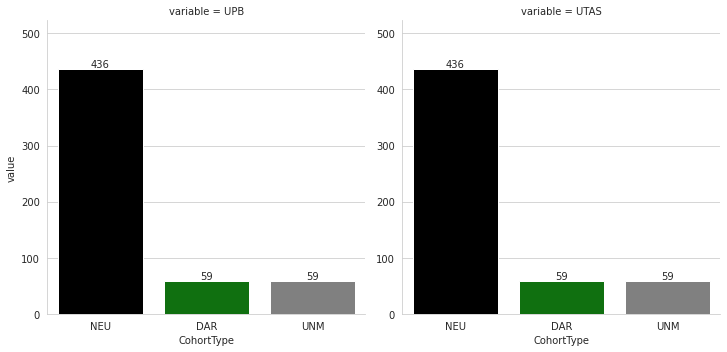

In [105]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')
counts_melted=pd.melt(counts, id_vars = ['CohortType'])


g = sns.catplot(
    data=counts_melted,
    x='CohortType', y='value',
    col='variable', kind='bar', col_wrap=5, sharey = False,       
    palette=sns.color_palette(['black', 'green','gray']))


##JAG TODO understand what is happening here
# iterate through axes
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)



In [106]:
# 3) TODO: Generate boxplot data to visualize individual and combinations of data

import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd

##creating dataframe - need to melt eaach combination of df, and then put them into one df
##for below boxplot

neu_ints_melt = pd.melt(neu_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")
if "Analyte" in neu_ints_melt.columns:
    neu_ints_melt=neu_ints_melt.rename(columns={"Analyte": "variable"})
    
dar_ints_melt=pd.melt(dar_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")
if "Analyte" in dar_ints_melt.columns:
    dar_ints_melt=dar_ints_melt.rename(columns={"Analyte": "variable"})
    
unm_ints_melt = pd.melt(unm_intersected_cols.drop('PIN_Patient', axis = 1), id_vars="CohortType")
if "Analyte" in unm_ints_melt.columns:
    unm_ints_melt=unm_ints_melt.rename(columns={"Analyte": "variable"})
    



all_combined_stacks_melts=pd.concat([neu_ints_melt,unm_ints_melt,dar_ints_melt], axis=0)

print("Checking that melted df has same correct number of values per cohorts")
print("Cohort values: ", all_combined_stacks_melts["CohortType"].unique())
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="NEU"].count()[0],"=", neu_size*(len(intersec_3_cohs_list)-2))
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="DAR"].count()[0],"=", dar_size*(len(intersec_3_cohs_list)-2))
print(all_combined_stacks_melts[all_combined_stacks_melts["CohortType"]=="UNM"].count()[0],"=", unm_size*(len(intersec_3_cohs_list)-2))
                                                                                                                          

Checking that melted df has same correct number of values per cohorts
Cohort values:  ['NEU' 'UNM' 'DAR']
872 = 872
118 = 118
118 = 118


NameError: name 'ann_text' is not defined

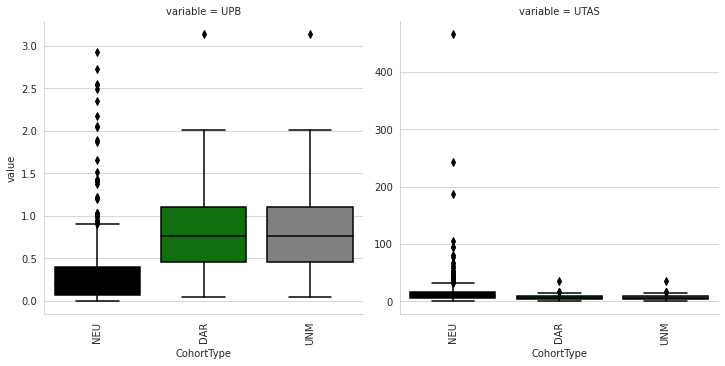

In [107]:
sns.set_style('whitegrid')

plot_df = all_combined_stacks_melts[all_combined_stacks_melts['CohortType'].isin(['NEU','DAR', 'UNM'])]
g = sns.catplot(
    data=plot_df,
    x='CohortType', y='value',
    col='variable', kind='box', col_wrap=5, sharey = False,
    palette=sns.color_palette(['black', 'green','gray']), order=['NEU','DAR', 'UNM']
)

# set rotation
g.set_xticklabels(rotation=90)

ann_text <- data.frame(mpg = 15,wt = 5,lab = "Text",
                       cyl = factor(8,levels = c("4","6","8")))
p + geom_text(data = ann_text,label = "Text")


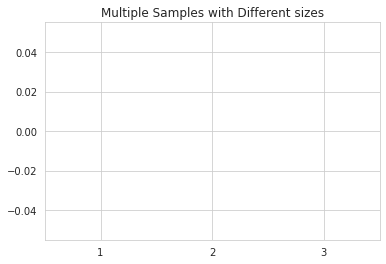

'\n\n# Create two subplots and unpack the output array immediately\nf, (ax1, ax2) = plt.subplots(1, 2, sharey=True)\nax1.plot(x, y)\nax1.set_title(\'Sharing Y axis\')\nax2.scatter(x, y)\n\n# Create four polar axes and access them through the returned array\nfig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))\naxs[0, 0].plot(x, y)\naxs[1, 1].scatter(x, y)\n\n# Share a X axis with each column of subplots\nplt.subplots(2, 2, sharex=\'col\')\n\n# Share a Y axis with each row of subplots\nplt.subplots(2, 2, sharey=\'row\')\n\n# Share both X and Y axes with all subplots\nplt.subplots(2, 2, sharex=\'all\', sharey=\'all\')\n\n# Note that this is the same as\nplt.subplots(2, 2, sharex=True, sharey=True)\n\n# Create figure number 10 with a single subplot\n# and clears it if it already exists.\nfig, ax = plt.subplots(num=10, clear=True)\n'

In [108]:
neu_uasb=plot_df[plot_df["CohortType"]=="NEU"]
neu_uasb=neu_uasb[neu_uasb["variable"]=="UASB"]["value"]

unm_uasb=plot_df[plot_df["CohortType"]=="UNM"]
unm_uasb=unm_uasb[unm_uasb["variable"]=="UASB"]["value"]

dar_uasb=plot_df[plot_df["CohortType"]=="DAR"]
dar_uasb=dar_uasb[dar_uasb["variable"]=="UASB"]["value"]

data = [neu_uasb,dar_uasb, unm_uasb]
fig7, ax7 = plt.subplots()
ax7.set_title('Multiple Samples with Different sizes')
ax7.boxplot(data)

plt.show()
"""

# Create two subplots and unpack the output array immediately
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
ax1.plot(x, y)
ax1.set_title('Sharing Y axis')
ax2.scatter(x, y)

# Create four polar axes and access them through the returned array
fig, axs = plt.subplots(2, 2, subplot_kw=dict(projection="polar"))
axs[0, 0].plot(x, y)
axs[1, 1].scatter(x, y)

# Share a X axis with each column of subplots
plt.subplots(2, 2, sharex='col')

# Share a Y axis with each row of subplots
plt.subplots(2, 2, sharey='row')

# Share both X and Y axes with all subplots
plt.subplots(2, 2, sharex='all', sharey='all')

# Note that this is the same as
plt.subplots(2, 2, sharex=True, sharey=True)

# Create figure number 10 with a single subplot
# and clears it if it already exists.
fig, ax = plt.subplots(num=10, clear=True)
"""

In [109]:

neu_uasb=plot_df[plot_df["CohortType"]=="NEU"]
neu_uasb=neu_uasb[neu_uasb["variable"]=="UASB"]["value"]

unm_uasb=plot_df[plot_df["CohortType"]=="UNM"]
unm_uasb=unm_uasb[unm_uasb["variable"]=="UASB"]["value"]

dar_uasb=plot_df[plot_df["CohortType"]=="DAR"]
dar_uasb=dar_uasb[dar_uasb["variable"]=="UASB"]["value"]

data = [neu_uasb,dar_uasb, unm_uasb]



0 1
0 2


IndexError: index 2 is out of bounds for axis 0 with size 2

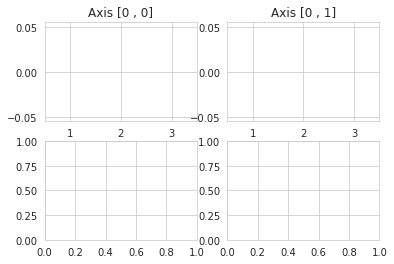

In [110]:
import math
features=intersec_3_cohs_list[2:]
fig, axs = plt.subplots(math.ceil(math.sqrt(i)), math.ceil(math.sqrt(i)))
i=1
r=0
c=0
while i<=len(features):
    while r<=math.ceil(math.sqrt(i)):
        while c<=math.ceil(math.sqrt(i)):
            axs[r, c].boxplot(data)
            axs[r, c].set_title('Axis ['+ str(r)+ " , " +str(c) +']')
            c=c+1
            print(str(r), str(c))
        r=r+1
    i=i+1


for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')

# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()
fig.tight_layout()
    

In [111]:
medians = plot_df.groupby(['CohortType',"variable"])['value'].count()
vertical_offset = plot_df['value'].median() * 0.05 # offset from median for display
print(medians)
for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center',size='x-small',color='w',weight='semibold')
    

CohortType  variable
DAR         UPB          59
            UTAS         59
NEU         UPB         436
            UTAS        436
UNM         UPB          59
            UTAS         59
Name: value, dtype: int64


NameError: name 'box_plot' is not defined

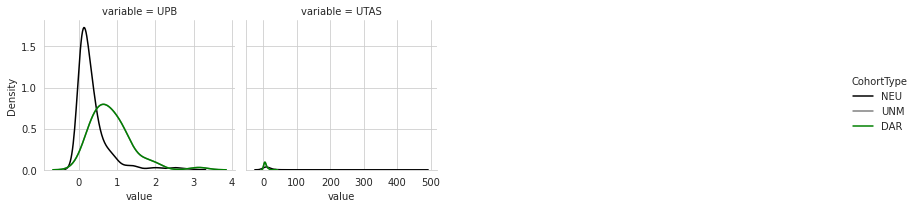

In [112]:
# 4) TODO: Generate a visualization also where you overlay the three density plots for each cohort over each other
# If you can add vertical lines in the distribution plot to show the mean.

g = sns.FacetGrid(plot_df, col='variable', hue='CohortType', col_wrap = 4, sharex = False,palette=sns.color_palette(['black', 'gray','green']))
p1 = g.map(sns.kdeplot, 'value').add_legend()


#example:
#https://stackoverflow.com/questions/41144357/showing-the-mean-line-in-a-density-plot-in-pandas

Text(0.5, 1.0, 'UNM')

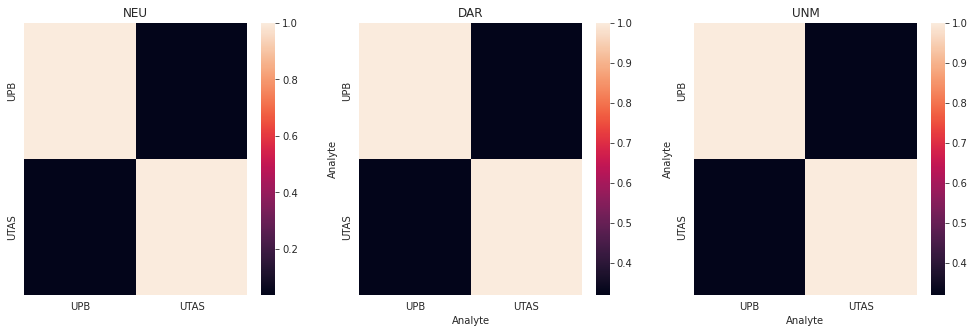

In [113]:
# 5) TODO: Correlate the 15 harmonized urine values but write your own correlation functions and visualizaions. 
##heatmap of correlation in each cohort 
import seaborn as sns
# Generate correlations for datasets:
# NEU
# DAR
# UNM

features=intersec_3_cohs_list[2:]

fig, ax =plt.subplots(1,3)
fig.set_size_inches(17, 5)

sns.heatmap(neu_df[intersec_3_cohs_list[2:]].corr(), ax=ax[0])
ax[0].set_title('NEU')
##ax[0].set_xticklabels(labels=features,rotation=45, fontsize=5)
##ax[0].set_yticklabels(labels=features,rotation=0)

sns.heatmap(dar_df[intersec_3_cohs_list[2:]].corr(), ax=ax[1])
ax[1].set_title('DAR')
##ax[1].set_xticklabels(labels=features,rotation=45)
##ax[1].set_yticklabels(labels=features,rotation=0)

sns.heatmap(unm_df[intersec_3_cohs_list[2:]].corr(), ax=ax[2])
ax[2].set_title('UNM')
##ax[2].set_xticklabels(labels=features,rotation=45)
##ax[2].set_yticklabels(labels=features,rotation=0)




### BLOD Graphs - Plotting number of detects (0) per Analyte

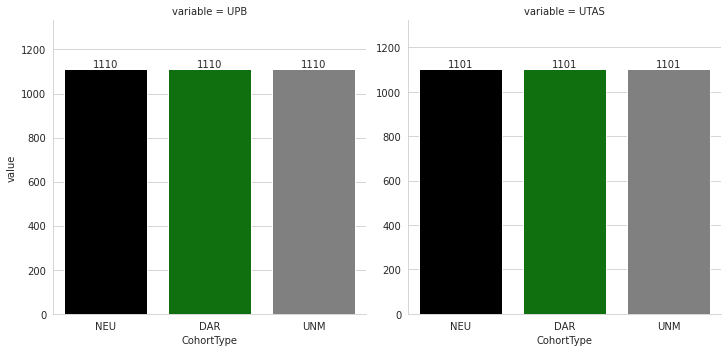

In [166]:
##creating BLOD df 
BLOD=pd.DataFrame(columns=["CohortType"], data=["NEU", "DAR", "UNM"])

##intesected columns iwth just bio-sample columns
copy_intersec=intersec_3_cohs_list
if "PIN_Patient" in copy_intersec:
    copy_intersec.remove("PIN_Patient")
if "CohortType" in copy_intersec:
    copy_intersec.remove("CohortType")

##filling df with number of 0's per each analyte per cohort
for col in copy_intersec:
    BLOD[col]=[neu_df_blod[neu_df_blod[col]==0].count()[0],
                  dar_df_blod[dar_df_blod[col]==0].count()[0],
                 dar_df_blod[dar_df_blod[col]==0].count()[0]]
BLOD_melted=pd.melt(BLOD, id_vars = ['CohortType'])

##creating barchart from the counts
g = sns.catplot(
    data=BLOD_melted,
    x='CohortType', y='value',
    col='variable', kind='bar', col_wrap=5, sharey = False,       
    palette=sns.color_palette(['black', 'green','gray']))

##adding label with is number of 0's per analyte
for ax in g.axes.ravel():
    
    # add annotations
    for c in ax.containers:
        labels = [f'{(v.get_height()):.0f}' for v in c]
        ax.bar_label(c, labels=labels, label_type='edge')
    ax.margins(y=0.2)



In [ ]:

# 6) TODO: Can you write about what you see. Are there any cohorts that are similar with the harmonized data? 
# Are there any analytes that are particularliy higher lower in specific cohorts.


### 7) TODO: Think about if how we could compare similarity between two cohorts?

- Look at the shape of the distributions
- Look at peak of distributions (mode)
- Look at median and compare to dashed line (mean)


### NHANES Data


In [ ]:
CAT_DAR_ANALYTES = [('Analytes', (
    # Analyate acronym and name,                    Mapping in the dar DB
    ('UAG', ' Silver - Urine'),                     # Ag in ug/L
    ('UAL', ' Aluminium - Urine'),                  # Al in ug/L
    ('UCR',  'Chromium - Urine'),                   # Cr in ug/L
    ('UCU',  'Copper - Urine'),                     # Cu in ug/L
    ('UFE',  'Iron - Urine'),                       # Fe in ug/L
    ('UNI',  'Niquel - Urine'),                     # Ni in ug/L
    ('UVA',  'Vanadium - Urine'),                   # V in ug/L
    ('UZN',  'Zinc - Urine'),                       # Zn in ug/L
    # ('BCD',  'Cadmium - Blood'),
    # ('BHGE', 'Ethyl Mercury - Blood'),
    # ('BHGM', 'Methyl Mercury - Blood'),
    # ('BMN',  'Manganese - Blood'),
    # ('BPB',  'Lead - Blood'),
    # ('BSE',  'Selenium - Blood'),
    # ('IHG',  'Inorganic Mercury - Blood'),
    # ('THG',  'Mercury Total - Blood'),
    # ('SCU',  'Copper - Serum'),
    # ('SSE',  'Selenium - Serum'),
    # ('SZN',  'Zinc - Serum'),
    ('UAS3', 'Arsenous (III) acid - Urine'),        # As in ug/L
    # ('UAS5', 'Arsenic (V) acid - Urine'),
    ('UASB', 'Arsenobetaine - Urine'),              # AsB in ug/L
    # ('UASC', 'Arsenocholine - Urine'),
    ('UBA',  'Barium - Urine'),                     # Ba in ug/L
    ('UBE',  'Beryllium - Urine'),                  # Be in ug/L
    ('UCD',  'Cadmium - Urine'),                    # Cd in ug/L
    ('UCO',  'Cobalt - Urine'),                     # Co in ug/L
    ('UCS',  'Cesium - Urine'),                     # Cs in ug/L
    ('UDMA', 'Dimethylarsinic Acid - Urine'),       # DMA in ug/L
    ('UHG',  'Mercury - Urine'),                    # Hg in ug/L
    # ('UIO',  'Iodine - Urine'),
    ('UMMA', 'Monomethylarsinic Acid - Urine'),     # MMA in ug/L
    ('UMN',  'Manganese - Urine'),                  # Mn in ug/L
    ('UMO',  'Molybdenum - Urine'),                 # Mo in ug/L
    ('UPB',  'Lead - Urine'),                       # PB in ug/L
    # ('UPT',  'Platinum - Urine'),
    ('USB',  'Antimony - Urine'),                   # Sb in ug/L
    ('USN',  'Tin - Urine'),                        # Sn in ug/L
    ('USR',  'Strontium - Urine'),                  # Sr in ug/L
    ('UTAS', 'Arsenic Total - Urine'),              # iAs in ug/L
    ('UTL',  'Thallium - Urine'),                   # Tl in ug/L
    # ('UTMO', 'Trimethylarsine - Urine')
    ('UTU',  'Tungsten - Urine'),                   # W in ug/L
    ('UUR',  'Uranium - Urine'),                    # U in ug/L

))]

CAT_NEU_ANALYTES = [('Analytes', (
    ('USB', 'Antimony - Urine'),
    ('UTAS', 'Arsenic Total - Urine'), #modified just for poster - change back later/check if it's actually total 
    ('UBA', 'Barium - Urine'),
    ('UBE', 'Beryllium - Urine'),
    ('UCD', 'Cadmium - Urine'),
    ('UCS', 'Cesium - Urine'),
    ('UCR', 'Chromium - Urine'),
    ('UCO', 'Cobalt - Urine'),
    ('UCU', 'Copper - Urine'),
    ('UPB', 'Lead - Urine'),
    ('UMN', 'Manganese - Urine'),
    ('UHG', 'Mercury - Urine'),
    ('UMO', 'Molybdenum - Urine'),
    ('UNI', 'Nickel - Urine'),
    ('UPT', 'Platinum - Urine'),
    ('USE', 'Selenium - Urine'),
    ('UTL', 'Thallium - Urine'),
    ('USN', 'Tin - Urine'),
    ('UTU', 'Tungsten - Urine'),
    ('UUR', 'Uranium - Urine'),
    ('UVA', 'Vanadium - Urine'),
    ('UZN', 'Zinc - Urine')
    # Blood
    # ('BSB', 'Antimony - Blood'   ),
    # ('BTAS','Arsenic - Blood'    ),
    # ('BAL', 'Aluminum - Blood'   ),
    # ('BBE', 'Beryllium - Blood'  ),
    # ('BBA', 'Barium - Blood'     ),
    # ('BCD', 'Cadmium - Blood'    ),
    # ('BCS', 'Cesium - Blood'     ),
    # ('BCO', 'Cobalt - Blood'     ),
    # ('BCU', 'Copper - Blood'     ),
    # ('BCR', 'Chromium - Blood'   ),
    # ('BFE', 'Iron - Blood'       ),
    # ('BPB', 'Lead - Blood'       ),
    # ('BPB208','Lead (208) - Blood'),
    # ('BMB', 'Manganese - Blood'  ),
    # ('BHG', 'Mercury - Blood'    ),
    # ('BMO', 'Molybdenum - Blood' ),
    # ('BNI', 'Nickel - Blood'     ),
    # ('BPT', 'Platinum - Blood'   ),
    # ('BTL', 'Thallium - Blood'   ),
    # ('BTU', 'Tungsten - Blood'   ),
    # ('BUR', 'Uranium - Blood'    ),
    # ('BVA', 'Vanadium - Blood'   ),
    # ('BSE', 'Selenium - Blood'),
    # ('BSEG1124', 'Selenium+G1124 - Blood'),
    # ('BSN', 'Tin - Blood'        ),
    # ('BZN', 'Zinc - Blood'       ),
))]

CAT_UNM_ANALYTES = [('Analytes', (
    ('BCD',  'Cadmium - Blood'),
    ('BHGE', 'Ethyl Mercury - Blood'),
    ('BHGM', 'Methyl Mercury - Blood'),
    ('BMN',  'Manganese - Blood'),
    ('BPB',  'Lead - Blood'),
    ('BSE',  'Selenium - Blood'),
    ('IHG',  'Inorganic Mercury - Blood'),
    ('THG',  'Mercury Total - Blood'),
    ('SCU',  'Copper - Serum'),
    ('SSE',  'Selenium - Serum'),
    ('SZN',  'Zinc - Serum'),
    ('UAS3', 'Arsenous (III) acid - Urine'),
    ('UAS5', 'Arsenic (V) acid - Urine'),
    ('UASB', 'Arsenobetaine - Urine'),
    ('UASC', 'Arsenocholine - Urine'),
    ('UBA',  'Barium - Urine'),
    ('UBE',  'Beryllium - Urine'),
    ('UCD',  'Cadmium - Urine'),
    ('UCO',  'Cobalt - Urine'),
    ('UCS',  'Cesium - Urine'),
    ('UDMA', 'Dimethylarsinic Acid - Urine'),
    ('UHG',  'Mercury - Urine'),
    ('UIO',  'Iodine - Urine'),
    ('UMMA', 'Monomethylarsinic Acid - Urine'),
    ('UMN',  'Manganese - Urine'),
    ('UMO',  'Molybdenum - Urine'),
    ('UPB',  'Lead - Urine'),
    ('UPT',  'Platinum - Urine'),
    ('USB',  'Antimony - Urine'),
    ('USN',  'Tin - Urine'),
    ('USR',  'Strontium - Urine'),
    ('UTAS', 'Arsenic Total - Urine'),
    ('UTL',  'Thallium - Urine'),
    ('UTMO', 'Trimethylarsine - Urine'),
    ('UTU',  'Tungsten -  Urine'),
    ('UUR',  'Uranium - Urine'),


))]

##all the NHANES variables 
##https://wwwn.cdc.gov/nchs/nhanes/search/datapage.aspx?Component=Laboratory&CycleBeginYear=2017
N_keywords=["Albumin","Creatinine","Arsenic",
        "Cholesterol",
        "Chromium", "Cobalt","Insulin","Iodine","Iron", "Lead", "Cadmium",
        "Mercury", "Selenium","Manganese", "Nickel"]

for kw in N_keywords:
    for analyte in CAT_NEU_ANALYTES[0][1]:
        if kw in analyte[1]:
            print("NHANES: "+ kw)
            print("Cohort: "+analyte[1],"\n")
            N_keywords.remove(kw)
for kw in N_keywords:
    for analyte in CAT_DAR_ANALYTES[0][1]:
        if kw in analyte[1]:
            print("NHANES: "+ kw)
            print("Cohort: "+analyte[1],"\n")
            N_keywords.remove(kw)

for kw in N_keywords:
    for analyte in CAT_UNM_ANALYTES[0][1]:
        if kw in analyte[1]:
            print("NHANES: "+ kw)
            print("Cohort: "+analyte[1],"\n")


In [292]:
##creating llod df --> Lower Limit of Detection
llod=pd.DataFrame(columns=["Analyte", "Value", "Units"])

##function to add llod data to llod
def add_llod(analyte, val, units):
    if analyte not in llod["Analyte"].values:
            return llod.append({"Analyte":analyte,"Value":val,"Units":units}, ignore_index=True)
    else:
        raise Exception('Analyte already in llod')


In [293]:
###Arsenic - Total - Urine
utas = pd.read_sas('UTAS_J.XPT')
utas=utas.rename(columns={"SEQN": "Particpiant", "WTSA2YR": "U_ Total Arsenic Weight",
                          "URXUAS": "U_ Total Arsenic", "URDUASLC": "UTAS BLOD"})
utas

,Particpiant,U_ Total Arsenic Weight,U_ Total Arsenic,UTAS BLOD
0,93707.0,24984.393699,5.09,5.397605e-79
1,93708.0,39395.670748,24.07,5.397605e-79
2,93711.0,43892.647648,2.89,5.397605e-79
3,93712.0,82049.890399,0.82,5.397605e-79
4,93714.0,40307.706698,5.48,5.397605e-79
...,...,...,...,...
2974,102947.0,39116.423368,7.73,5.397605e-79
2975,102948.0,380997.915522,6.59,5.397605e-79
2976,102949.0,95290.158956,2.79,5.397605e-79
2977,102951.0,42768.230710,19.15,5.397605e-79


In [294]:
llod=add_llod("U_ Total Arsenic",0.23,"µg/L")
llod

,Analyte,Value,Units
0,U_ Total Arsenic,0.23,µg/L


In [295]:
##Albumin & Creatinine - Urine 
##JAG TO DO add time period column
lb_cr = pd.read_sas('ALB_CR_J.XPT')
lb_cr=lb_cr.rename(columns={"SEQN": "Particpiant", 
                            "URXUMS": "U_Albumin mg/L", "URDUMALC": "Albumin BLOD", 
                            "URXUCR" : "U_Creatinine mg/dL",
                            "URXCRS":"U_Creatinine umol/L", "URDUCRLC": "Creatinine BLOD", 
                            "URDACT":"Albumin:creatinine  mg/g"})
lb_cr=lb_cr[["Particpiant","U_Albumin mg/L","Albumin BLOD","U_Creatinine mg/dL",
                            "U_Creatinine umol/L", "Creatinine BLOD", 
                            "Albumin:creatinine  mg/g"]]
lb_cr
##get rid of umol/L

,Particpiant,U_Albumin mg/L,Albumin BLOD,U_Creatinine mg/dL,U_Creatinine umol/L,Creatinine BLOD,Albumin:creatinine mg/g
0,93705.0,3.2,5.397605e-79,24.0,2121.6,5.397605e-79,13.33
1,93706.0,39.6,5.397605e-79,69.0,6099.6,5.397605e-79,57.39
2,93707.0,41.6,5.397605e-79,209.0,18475.6,5.397605e-79,19.90
3,93708.0,9.1,5.397605e-79,47.0,4154.8,5.397605e-79,19.36
4,93709.0,26.4,5.397605e-79,215.0,19006.0,5.397605e-79,12.28
...,...,...,...,...,...,...,...
7931,102952.0,5.3,5.397605e-79,51.0,4508.4,5.397605e-79,10.39
7932,102953.0,10.2,5.397605e-79,231.0,20420.4,5.397605e-79,4.42
7933,102954.0,3.4,5.397605e-79,31.0,2740.4,5.397605e-79,10.97
7934,102955.0,83.2,5.397605e-79,177.0,15646.8,5.397605e-79,47.01


In [296]:
llod=add_llod("U_Albumin",0.30,"µg/mL")
llod=add_llod("U_Creatinine",5.00,"mg/dL")

llod

,Analyte,Value,Units
0,U_ Total Arsenic,0.23,µg/L
1,U_Albumin,0.30,µg/mL
2,U_Creatinine,5.00,mg/dL


In [297]:
##Chromium - Urine
ucm = pd.read_sas('UCM_J.XPT')
ucm=ucm.rename(columns={"SEQN":"Participant", "WTSA2YR":"U_Chromium Weight", "URXUCM": "U_Chromium ug/L",
                       "URDUCMLC" :"U_Chromium BLOD"})
ucm

,Participant,U_Chromium Weight,U_Chromium ug/L,U_Chromium BLOD
0,93707.0,24984.393699,0.23,5.397605e-79
1,93708.0,39395.670748,0.29,5.397605e-79
2,93711.0,43892.647648,0.13,1.000000e+00
3,93712.0,82049.890399,0.13,1.000000e+00
4,93714.0,40307.706698,0.13,1.000000e+00
...,...,...,...,...
2974,102947.0,39116.423368,0.19,5.397605e-79
2975,102948.0,380997.915522,0.13,1.000000e+00
2976,102949.0,95290.158956,0.22,5.397605e-79
2977,102951.0,42768.230710,0.54,5.397605e-79


In [298]:
llod=add_llod("U_Chromium ",0.19,"µg/L")
llod

,Analyte,Value,Units
0,U_ Total Arsenic,0.23,µg/L
1,U_Albumin,0.30,µg/mL
2,U_Creatinine,5.00,mg/dL
3,U_Chromium,0.19,µg/L


In [299]:
##Iodine - Urine
uio= pd.read_sas('UIO_J.XPT')
uio=uio.rename(columns={"SEQN":"Participant", "WTSA2YR":"U_Iodine Weight", "URXUIO": "U_Iodine ug/L",
                       "URDUIOLC" :"U_Iodine BLOD"})
uio

,Participant,U_Iodine Weight,U_Iodine ug/L,U_Iodine BLOD
0,93707.0,24984.393699,723.3,5.397605e-79
1,93708.0,39395.670748,197.0,5.397605e-79
2,93711.0,43892.647648,166.0,5.397605e-79
3,93712.0,82049.890399,27.0,5.397605e-79
4,93714.0,40307.706698,185.2,5.397605e-79
...,...,...,...,...
2974,102947.0,39116.423368,139.8,5.397605e-79
2975,102948.0,380997.915522,125.4,5.397605e-79
2976,102949.0,95290.158956,320.2,5.397605e-79
2977,102951.0,42768.230710,88.0,5.397605e-79


In [300]:
llod=add_llod("U_Iodine ",2.4,"ug/L")
llod

,Analyte,Value,Units
0,U_ Total Arsenic,0.23,µg/L
1,U_Albumin,0.30,µg/mL
2,U_Creatinine,5.00,mg/dL
3,U_Chromium,0.19,µg/L
4,U_Iodine,2.40,ug/L


In [301]:
##Iodine - Urine
uhg= pd.read_sas('UHG_J.XPT')
uhg=uhg.rename(columns={"SEQN":"Participant", "WTSA2YR":"U_Mercury Weight", "URXUHG": "U_Mercury ug/L",
                       "URDUHGLC" :"U_Mercury BLOD"})
uhg

,Participant,U_Mercury Weight,U_Mercury ug/L,U_Mercury BLOD
0,93707.0,24984.393699,0.09,1.000000e+00
1,93708.0,39395.670748,0.63,5.397605e-79
2,93711.0,43892.647648,0.09,1.000000e+00
3,93712.0,82049.890399,0.09,1.000000e+00
4,93714.0,40307.706698,0.09,1.000000e+00
...,...,...,...,...
2974,102947.0,39116.423368,0.09,1.000000e+00
2975,102948.0,380997.915522,0.95,5.397605e-79
2976,102949.0,95290.158956,0.09,1.000000e+00
2977,102951.0,42768.230710,0.09,1.000000e+00


In [302]:
llod=add_llod("U_Mercury",0.13,"ug/L")
llod

,Analyte,Value,Units
0,U_ Total Arsenic,0.23,µg/L
1,U_Albumin,0.30,µg/mL
2,U_Creatinine,5.00,mg/dL
3,U_Chromium,0.19,µg/L
4,U_Iodine,2.40,ug/L
5,U_Mercury,0.13,ug/L


In [308]:
##Iodine - Urine
um= pd.read_sas('UM_J.XPT')
um=um.rename(columns={"SEQN":"Participant", "WTSA2YR":"U_Metals Weight*", "URXUBA ": "U_Barium* ug/L",
                       "URDUBALC " :"U_Barium BLOD", "URXUCD":"U_Cadmium* ug/L",
                     "URDUCDLC":"U_Cadmium BLOD", "URXUCO":"U_Cobalt* ug/L","URDUCOLC":"U_Cobalt BLOD",
                     "URXUCS":"U_Cesium* ug/L","URDUCSLC":"U_Cesium* BLOD", 
                     "URXUMO":"U_Molybdenum* ug/L","URDUMOLC":"U_Molybdenum BLOD","URXUMN":"U_Manganese* ug/L",
                      "URDUMNLC":"U_Manganese BLOD","URXUPB":"U_Lead* ug/L","URDUPBLC":"U_Lead BLOD",
                      "URXUSB":"U_Antimony* ug/L", "URDUSBLC":"U_Antimony BLOD","URXUSN":"U_Tin* ug/L",
                      "URDUSNLC":"U_Tin BLOD","URXUTL":"U_Thallium* ug/L","URDUTLLC":"U_Thallium BLOD",
                      "URXUTU":"U_Tungsten* ug/L", "URDUTULC":"U_Tungsten BLOD"})
um

,Participant,U_Metals Weight*,URXUBA,URDUBALC,U_Cadmium* ug/L,U_Cadmium BLOD,U_Cobalt* ug/L,U_Cobalt BLOD,U_Cesium* ug/L,U_Cesium* BLOD,...,U_Lead* ug/L,U_Lead BLOD,U_Antimony* ug/L,U_Antimony BLOD,U_Tin* ug/L,U_Tin BLOD,U_Thallium* ug/L,U_Thallium BLOD,U_Tungsten* ug/L,U_Tungsten BLOD
0,93707.0,24984.393699,0.79,5.397605e-79,0.050,5.397605e-79,1.675,5.397605e-79,4.925,5.397605e-79,...,0.32,5.397605e-79,0.052,5.397605e-79,0.370,5.397605e-79,0.332,5.397605e-79,0.279,5.397605e-79
1,93708.0,39395.670748,0.92,5.397605e-79,0.379,5.397605e-79,0.435,5.397605e-79,7.037,5.397605e-79,...,0.50,5.397605e-79,0.038,5.397605e-79,0.064,1.000000e+00,0.485,5.397605e-79,0.013,1.000000e+00
2,93711.0,43892.647648,0.70,5.397605e-79,0.110,5.397605e-79,0.319,5.397605e-79,5.061,5.397605e-79,...,0.41,5.397605e-79,0.016,1.000000e+00,0.064,1.000000e+00,0.178,5.397605e-79,0.023,5.397605e-79
3,93712.0,82049.890399,3.77,5.397605e-79,0.025,1.000000e+00,0.111,5.397605e-79,0.321,5.397605e-79,...,0.45,5.397605e-79,0.023,5.397605e-79,0.064,1.000000e+00,0.044,5.397605e-79,0.019,5.397605e-79
4,93714.0,40307.706698,2.12,5.397605e-79,0.321,5.397605e-79,0.514,5.397605e-79,7.703,5.397605e-79,...,0.64,5.397605e-79,0.085,5.397605e-79,1.490,5.397605e-79,0.320,5.397605e-79,0.070,5.397605e-79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,102947.0,39116.423368,0.13,5.397605e-79,0.279,5.397605e-79,0.474,5.397605e-79,5.259,5.397605e-79,...,0.50,5.397605e-79,0.177,5.397605e-79,6.730,5.397605e-79,0.148,5.397605e-79,0.194,5.397605e-79
2975,102948.0,380997.915522,0.68,5.397605e-79,0.147,5.397605e-79,0.376,5.397605e-79,3.735,5.397605e-79,...,0.17,5.397605e-79,0.032,5.397605e-79,0.650,5.397605e-79,0.203,5.397605e-79,0.021,5.397605e-79
2976,102949.0,95290.158956,4.73,5.397605e-79,0.839,5.397605e-79,0.950,5.397605e-79,5.570,5.397605e-79,...,0.55,5.397605e-79,0.059,5.397605e-79,1.110,5.397605e-79,0.163,5.397605e-79,0.152,5.397605e-79
2977,102951.0,42768.230710,0.38,5.397605e-79,0.025,1.000000e+00,0.461,5.397605e-79,1.945,5.397605e-79,...,NaN,NaN,0.078,5.397605e-79,0.340,5.397605e-79,0.096,5.397605e-79,0.116,5.397605e-79


In [304]:
llod=add_llod("U_Barium",0.060,"ug/L")
llod=add_llod("U_Cadmium",0.036,"ug/L")
llod=add_llod("U_Cesium",0.086,"ug/L")
llod=add_llod("U_Cobalt",0.023,"ug/L")
llod=add_llod("U_Manganese",0.13,"ug/L")
llod=add_llod("U_Molybdenum",0.80,"ug/L")
llod=add_llod("U_Lead",0.03,"ug/L")
llod=add_llod("U_Antimony",0.022,"ug/L")
llod=add_llod("U_Thallium",0.018,"ug/L")
llod=add_llod("U_Tin",0.09,"ug/L")
llod=add_llod("U_Tungsten",0.018,"ug/L")



llod

,Analyte,Value,Units
0,U_ Total Arsenic,0.230,µg/L
1,U_Albumin,0.300,µg/mL
2,U_Creatinine,5.000,mg/dL
3,U_Chromium,0.190,µg/L
4,U_Iodine,2.400,ug/L
5,U_Mercury,0.130,ug/L
6,Barium,0.060,ug/L
7,Cadmium,0.036,ug/L
8,Cesium,0.086,ug/L
9,Cobalt,0.023,ug/L


In [312]:
##Nickel - Urine
uni= pd.read_sas('UNI_J.XPT')
uni=uni.rename(columns={"SEQN":"Participant", "WTSA2YR":"U_Nickel Weight", 
                       "URXUNI":"U_Nickel ug/L","URDUNILC":"U_ Nickel BLOD"})
uni

,Participant,U_Nickel Weight,U_Nickel ug/L,U_ Nickel BLOD
0,93707.0,24984.393699,3.58,5.397605e-79
1,93708.0,39395.670748,2.37,5.397605e-79
2,93711.0,43892.647648,0.71,5.397605e-79
3,93712.0,82049.890399,5.27,5.397605e-79
4,93714.0,40307.706698,1.33,5.397605e-79
...,...,...,...,...
2974,102947.0,39116.423368,1.80,5.397605e-79
2975,102948.0,380997.915522,1.08,5.397605e-79
2976,102949.0,95290.158956,0.99,5.397605e-79
2977,102951.0,42768.230710,1.94,5.397605e-79


In [310]:
llod=add_llod("U_Nickel",0.31,"ug/L")
llod

,Analyte,Value,Units
0,U_ Total Arsenic,0.230,µg/L
1,U_Albumin,0.300,µg/mL
2,U_Creatinine,5.000,mg/dL
3,U_Chromium,0.190,µg/L
4,U_Iodine,2.400,ug/L
5,U_Mercury,0.130,ug/L
6,Barium,0.060,ug/L
7,Cadmium,0.036,ug/L
8,Cesium,0.086,ug/L
9,Cobalt,0.023,ug/L
